In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
data = pd.read_csv('./data/Log_2024-07-29_002637.csv')
time = np.array(data['Time (s)'])
thrust = np.array(data['Thrust (kgf)']) + 0.02
torque = np.array(data['Torque (kgf·m)'])
esc = np.array(data['ESC signal (µs)'].fillna(1000))
speed = np.array(data['Motor Optical Speed (rad/s)'].fillna(1000))
pwm = np.array(data['ESC signal (µs)'].fillna(0))

time constant up 0.16485250750750402


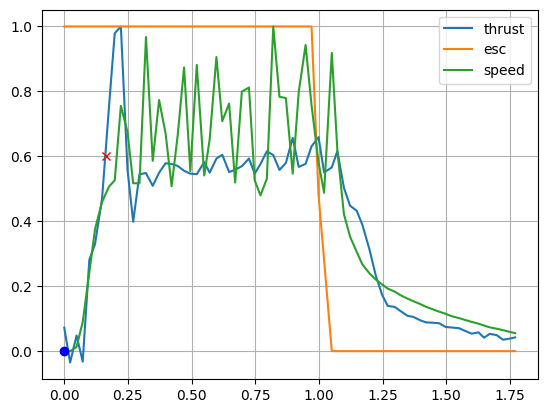

In [12]:
time_range = np.where(np.logical_and(time > 11.7, time < 13.5))
time_norm = time[time_range] - time[time_range][0]
thrust_norm = thrust[time_range] / np.max(thrust[time_range])
torque_norm = torque[time_range] / np.max([torque])
esc_norm = (esc[time_range] - np.min(esc[time_range])) / (np.max(esc[time_range]) - np.min(esc[time_range]))
speed_norm = (speed[time_range] - np.min(speed[time_range])) / (np.max(speed[time_range]) - np.min(speed[time_range]))

plt.plot(time_norm, thrust_norm, label='thrust')
plt.plot(time_norm, esc_norm, label='esc')
plt.plot(time_norm, speed_norm, label='speed')
plt.grid()
plt.legend()

new_time = np.linspace(time_norm[0], time_norm[-1], 1000)
tj = np.where(np.interp(new_time, time_norm, thrust_norm) > 1 - 1/np.exp(1))[0][0]
time_constant_up = new_time[tj]

plt.plot(0, 0, 'bo')
plt.plot(new_time[tj], 0.6, 'rx')
print('time constant up', time_constant_up)

time_constant_down 0.22264360360358254


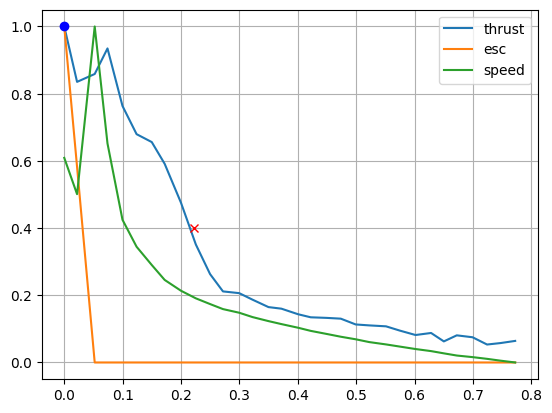

In [13]:
time_range = np.where(np.logical_and(time > 12.7, time < 13.5))
time_norm = time[time_range] - time[time_range][0]
thrust_norm = thrust[time_range] / np.max(thrust[time_range])
torque_norm = torque[time_range] / np.max([torque])
esc_norm = (esc[time_range] - np.min(esc[time_range])) / (np.max(esc[time_range]) - np.min(esc[time_range]))
speed_norm = (speed[time_range] - np.min(speed[time_range])) / (np.max(speed[time_range]) - np.min(speed[time_range]))

plt.plot(time_norm, thrust_norm, label='thrust')
plt.plot(time_norm, esc_norm, label='esc')
plt.plot(time_norm, speed_norm, label='speed')
plt.grid()
plt.legend()

new_time = np.linspace(time_norm[0], time_norm[-1], 1000)
tj = np.where(np.interp(new_time, time_norm, thrust_norm) < 1/np.exp(1))[0][0]
time_constant_down = new_time[tj]

plt.plot(0, 1, 'bo')
plt.plot(new_time[tj], 0.4, 'rx')
print('time_constant_down', time_constant_down)

In [5]:
data

,Time (s),ESC signal (µs),Servo 1 (µs),Servo 2 (µs),Servo 3 (µs),AccX (g),AccY (g),AccZ (g),Torque (kgf·m),Thrust (kgf),...,Motor Electrical Speed (rad/s),Motor Optical Speed (rad/s),Electrical Power (W),Mechanical Power (W),Motor Efficiency (%),Propeller Mech. Efficiency (kgf/W),Overall Efficiency (kgf/W),Vibration (g),App message,Unnamed: 21
0,0.000000,NaN,NaN,NaN,NaN,-0.0625,0.042969,-0.970703,0.000256,-0.029517,...,0.0,0.0,0.011947,0.0,0.0,0.0,0.0,0.058594,NaN,NaN
1,0.000000,NaN,NaN,NaN,NaN,-0.0625,0.046875,-0.970703,0.000256,-0.028968,...,0.0,0.0,0.192431,0.0,0.0,0.0,0.0,0.058594,NaN,NaN
2,0.021750,NaN,NaN,NaN,NaN,-0.0625,0.046875,-0.968750,0.000264,-0.029588,...,0.0,0.0,0.048961,0.0,0.0,0.0,0.0,0.058594,NaN,NaN
3,0.049270,NaN,NaN,NaN,NaN,-0.0625,0.044922,-0.970703,0.000268,-0.029266,...,0.0,0.0,0.058349,0.0,0.0,0.0,0.0,0.058594,NaN,NaN
4,0.073855,NaN,NaN,NaN,NaN,-0.0625,0.044922,-0.970703,0.000252,-0.028985,...,0.0,0.0,0.024149,0.0,0.0,0.0,0.0,0.058594,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,35.276715,NaN,NaN,NaN,NaN,-0.0625,0.044922,-0.970703,0.000364,-0.014771,...,0.0,0.0,0.220558,0.0,0.0,0.0,0.0,0.058594,NaN,NaN
1413,35.301570,NaN,NaN,NaN,NaN,-0.0625,0.044922,-0.970703,0.000369,-0.014731,...,0.0,0.0,0.011811,0.0,0.0,0.0,0.0,0.058594,NaN,NaN
1414,35.324790,NaN,NaN,NaN,NaN,-0.0625,0.044922,-0.970703,0.000371,-0.015051,...,0.0,0.0,0.031882,0.0,0.0,0.0,0.0,0.058594,NaN,NaN
1415,35.349350,NaN,NaN,NaN,NaN,-0.0625,0.046875,-0.966797,0.000370,-0.015384,...,0.0,0.0,0.132243,0.0,0.0,0.0,0.0,0.058594,NaN,NaN


(750.0, 925.0)

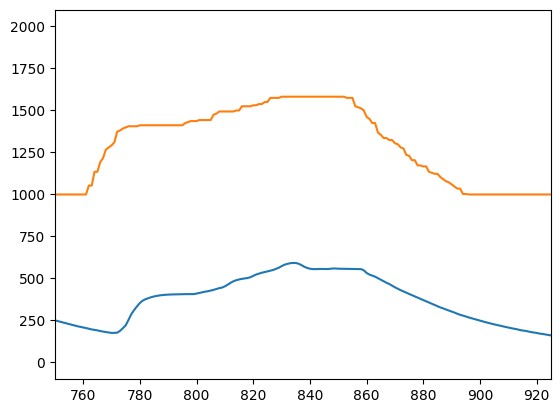

In [27]:
data['Motor Optical Speed (rad/s)'].plot()
plt.plot(pwm)
plt.gca().set_xlim(750, 925)

(790.0, 800.0)

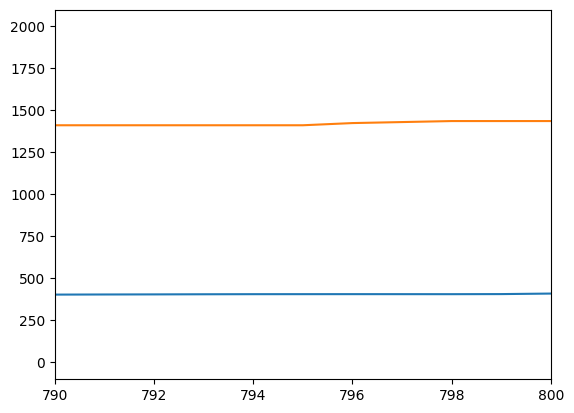

In [29]:
data['Motor Optical Speed (rad/s)'].plot()
plt.plot(pwm)
plt.gca().set_xlim(790, 800)

(840.0, 850.0)

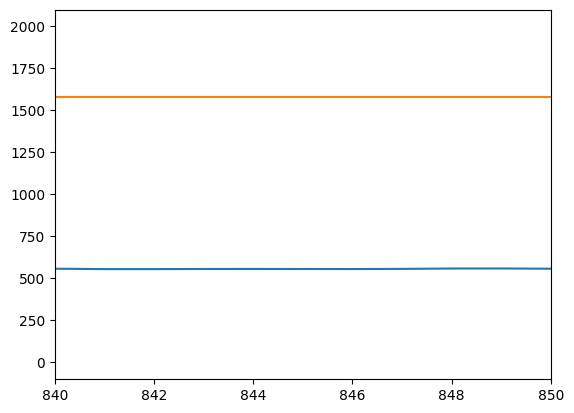

In [28]:
data['Motor Optical Speed (rad/s)'].plot()
plt.plot(pwm)
plt.gca().set_xlim(840, 850)

(2000.0, 973.453899644496)

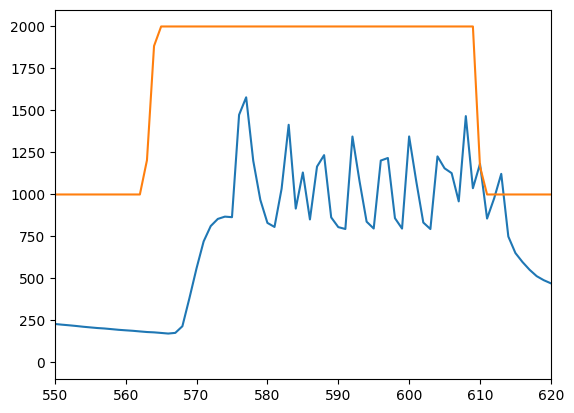

In [49]:
data['Motor Optical Speed (rad/s)'].plot()
plt.plot(pwm)
plt.gca().set_xlim(550, 620)
pwm[590], speed[590:600].mean()

In [36]:
pwm[790], speed[790]

(1412.0, 404.00881525296)

In [37]:
pwm[840], speed[840]

(1582.0, 558.1562947896)

In [50]:
pwm[840], speed[840]

(1582.0, 558.1562947896)

[   1.02793909 1001.6459548 ]


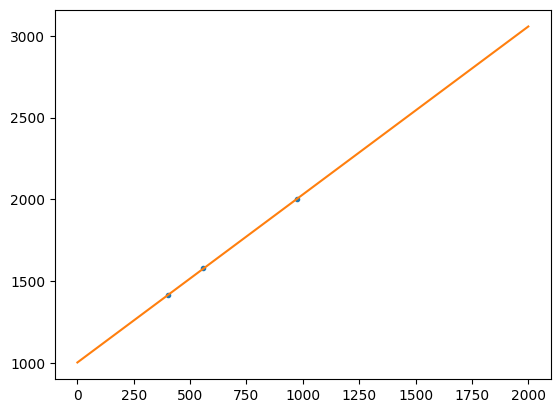

In [57]:
y = [1412, 1582, 2000] # pwm
x = [404, 558, 973] # speed
plt.plot(x, y, '.')
c = np.polyfit(x, y, 1)
x_fit = np.linspace(0, 2000)
y_fit = c[0] * x_fit + c[1]
plt.plot(x_fit, y_fit, '-')
print(c)

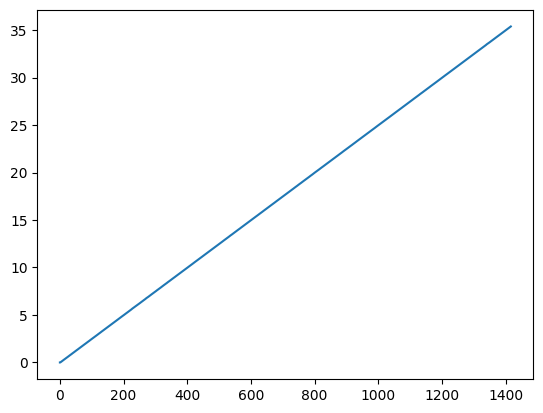

In [34]:
plt.plot(time)